PREDICTION OF PARKINSON DISEASE USING MACHINE LEARING ALGORITHM


In [ ]:
import pandas as pd
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/parkinsons.csv')

In [ ]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [ ]:
data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [ ]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Text(0.5, 0, 'Class')

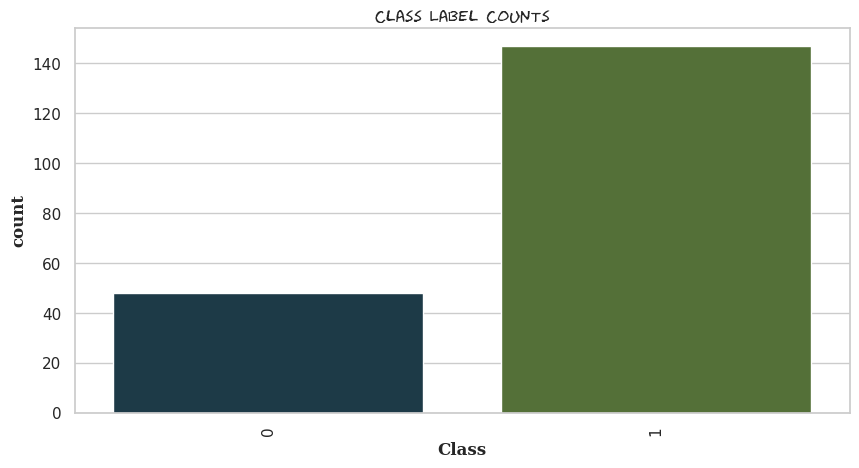

In [ ]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="status", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
  # Creating plot
fig = plt.figure(figsize =(20, 5))
sns.countplot(data['name'])


ValueError: ignored

<Figure size 2000x500 with 0 Axes>

In [ ]:
# show plot
plt.show()


In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['status']== 1]
df_minority = data[data['status']== 0]

# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=1000,random_state=100)
df_majority_downsampled = resample(df_majority, replace=True,n_samples=1000,random_state=100)

# Combine minority class with doswnsampled majority class
df_balanced = pd.concat([df_minority_upsampled, df_majority_downsampled])

# Display new class counts
df_balanced['status'].value_counts()

0    1000
1    1000
Name: status, dtype: int64

In [ ]:
sns.countplot(df_balanced['status'])
plt.grid()
plt.legend()
plt.title(' 0 :not affected & 1 : affected ')
plt.show()
print(' ')
plt.pie([1000,1000],labels=['not affected','affect'],autopct='%.2f%%')
plt.legend(loc=(1,0.5))
plt.title(' 0 :not affected & 1 : affect ')
plt.show()

ValueError: ignored

In [ ]:
# shuffle the DataFrame rows
data= df_balanced.sample(frac = 1)

In [ ]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
65,phon_R01_S17_6,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
166,phon_R01_S42_2,237.323,243.709,229.256,0.00303,0.00001,0.00173,0.00159,0.00519,0.01242,...,0.02089,0.00533,24.679,0,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
90,phon_R01_S21_7,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.06640,...,0.10949,0.08725,11.744,1,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
46,phon_R01_S10_5,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,...,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
21,phon_R01_S05_4,153.880,172.860,78.128,0.00480,0.00003,0.00232,0.00267,0.00696,0.04137,...,0.06062,0.01849,19.493,1,0.629017,0.698951,-5.186960,0.237622,2.557536,0.259765
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483


In [ ]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop('name',axis=1,inplace=True)

In [ ]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
166,237.323,243.709,229.256,0.00303,0.00001,0.00173,0.00159,0.00519,0.01242,0.116,...,0.02089,0.00533,24.679,0,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
90,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.06640,0.634,...,0.10949,0.08725,11.744,1,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
46,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,0.141,...,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
151,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
21,153.880,172.860,78.128,0.00480,0.00003,0.00232,0.00267,0.00696,0.04137,0.370,...,0.06062,0.01849,19.493,1,0.629017,0.698951,-5.186960,0.237622,2.557536,0.259765
99,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483


In [ ]:
#  get the all features except "status"
x = data.loc[:, data.columns != 'status']


In [ ]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
166,237.323,243.709,229.256,0.00303,0.00001,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
90,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.06640,0.634,...,0.05114,0.10949,0.08725,11.744,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
46,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,0.141,...,0.01149,0.02719,0.00476,24.602,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
151,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,0.13778,0.16942,0.21713,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,0.821,...,0.08808,0.11411,0.07530,12.359,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
21,153.880,172.860,78.128,0.00480,0.00003,0.00232,0.00267,0.00696,0.04137,0.370,...,0.04525,0.06062,0.01849,19.493,0.629017,0.698951,-5.186960,0.237622,2.557536,0.259765
99,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,0.659,...,0.05783,0.10833,0.16744,12.435,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483


In [ ]:
y = data.iloc[:,-7]

In [ ]:
y

65     0
166    0
90     1
46     0
151    1
      ..
146    1
192    0
21     1
99     1
181    1
Name: status, Length: 2000, dtype: int64

In [ ]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
65,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.01234,0.02827,0.00420,24.547,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
166,237.323,243.709,229.256,0.00303,0.00001,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
90,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.06640,0.634,...,0.05114,0.10949,0.08725,11.744,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
46,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,0.141,...,0.01149,0.02719,0.00476,24.602,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
151,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,0.13778,0.16942,0.21713,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367


In [ ]:
y.tail()

146    1
192    0
21     1
99     1
181    1
Name: status, dtype: int64